# Credit Risk Modelling Data Preprocessing 

## importing relevent libraries

In [454]:
import pandas as pd
import numpy as np

## Import the relevant data

In [455]:
loan_data_backup = pd.read_csv('basic_preprocessed_data.csv')

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\4035898271.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('basic_preprocessed_data.csv')


In [456]:
loan_data_backup.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [457]:
# creating a copy of the data for backup

loan_data = loan_data_backup

In [458]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

## General Preprocessing

### confirm all continous data is of numeric data type, if not then do conversion

In [460]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

#### 1. Converting term variable to numeric form

In [461]:
# first string(object) data type column is 'term'
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [462]:
#creating a copy as term int
loan_data['term_int'] = loan_data['term'].str.replace('months', '')
loan_data['term_int'] = loan_data['term_int'].str.replace(' ' , '')

In [463]:
loan_data['term_int'].unique()

array(['36', '60'], dtype=object)

In [464]:
#check data type of the term column
type(loan_data['term_int'][0])

str

In [465]:
#convert the data type into the numeric form 
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [466]:
type(loan_data['term_int'][0])

numpy.int64

In [467]:
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

#### 2. Converting emp_length to numeric form

In [468]:
type(loan_data['emp_length'][0])

str

In [469]:
#getting unique values of the loan_data data columns
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [470]:
#creating copy of the data
loan_data['emp_length_int'] = loan_data['emp_length']

# Remove ' years' and ' year'
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '', regex=True)

# Replace '< 1' with 0 and '10+' with 10
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1', '0', regex=True)
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('10\+', '10', regex=True)

In [471]:
#replacing n/a values with str(0)
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna('0')

In [472]:
loan_data['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7'],
      dtype=object)

In [473]:
#converting emp_length_int into the numeric datatype variable
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [474]:
type(loan_data['emp_length_int'][0])

numpy.int64

In [475]:
sorted(loan_data['emp_length_int'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### 3. Converting earliest_cr_line into date type columns

In [476]:
loan_data['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [477]:
type(loan_data['earliest_cr_line'][0])

str

In [478]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [479]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [480]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [481]:
#intializing reference date
reference_date = pd.to_datetime('2017-12-01')

# Calculate the number of months difference manually
loan_data['months_since_earliest_cr_line'] = round(pd.to_numeric(
    (reference_date.year - loan_data['earliest_cr_line_date'].dt.year) * 12 +
    (reference_date.month - loan_data['earliest_cr_line_date'].dt.month)
))

In [482]:
loan_data['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

In [483]:
loan_data.loc[: , ['earliest_cr_line' , 'earliest_cr_line_date' , 'months_since_earliest_cr_line']][loan_data['months_since_earliest_cr_line'] <0 ]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [484]:
loan_data['months_since_earliest_cr_line'][loan_data['months_since_earliest_cr_line'] < 0] = loan_data['months_since_earliest_cr_line'].max()

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\1091475391.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loan_data['months_since_earliest_cr_line'][loan_data['months_since_earliest_cr_line'] < 0] = loan_data['months_since_earliest_cr_

In [485]:
min(loan_data['months_since_earliest_cr_line'])

73.0

#### 4. Converting issue_d to the months variable

In [486]:
loan_data['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

In [487]:
type(loan_data['issue_d'][0])

str

In [488]:
#creating copy of issue_d in dataframe
loan_data['issue_d_date'] = loan_data['issue_d']

#converting issue_d_date into date format
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d_date'] , format = '%b-%y')

In [489]:
type(loan_data['issue_d_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [490]:
#intializing reference date
reference_date = pd.to_datetime('2017-12-01')

loan_data['issue_months'] = round(pd.to_numeric(
    (reference_date.year - loan_data['issue_d_date'].dt.year)*12 +
    (reference_date.month - loan_data['issue_d_date'].dt.month)
))

In [491]:
loan_data['issue_months'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: issue_months, dtype: float64

### Preprocessing Discrete Variable

here we are just converting all the discrete variables into the dummies
columns are :
1. grade
2. sub_grade
3. home_ownership
4. verification_status
5. loan_data
6. purpose
7. addr_status
8. initial_list_status

In [492]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 80 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   id                             466285 non-null  int64         
 1   member_id                      466285 non-null  int64         
 2   loan_amnt                      466285 non-null  int64         
 3   funded_amnt                    466285 non-null  int64         
 4   funded_amnt_inv                466285 non-null  float64       
 5   term                           466285 non-null  object        
 6   int_rate                       466285 non-null  float64       
 7   installment                    466285 non-null  float64       
 8   grade                          466285 non-null  object        
 9   sub_grade                      466285 non-null  object        
 10  emp_title                      438697 non-null  object        
 11  

In [493]:
#converting descrete variables into the dummies
pd.get_dummies(loan_data['grade'] , prefix = 'grade' , prefix_sep = ':' )

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
466280,False,False,True,False,False,False,False
466281,False,False,False,True,False,False,False
466282,False,False,False,True,False,False,False
466283,True,False,False,False,False,False,False


In [494]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'] , prefix = 'grade' , prefix_sep = ':' ) ,
                     pd.get_dummies(loan_data['sub_grade'] , prefix = 'sub_grade' , prefix_sep = ':' ),
                     pd.get_dummies(loan_data['home_ownership'] , prefix = 'home_ownership' , prefix_sep = ':' ),
                     pd.get_dummies(loan_data['verification_status'] , prefix = 'verification_status' , prefix_sep = ':' ),
                     pd.get_dummies(loan_data['loan_status'] , prefix = 'loan_status' , prefix_sep = ':' ),
                     pd.get_dummies(loan_data['purpose'] , prefix = 'purpose' , prefix_sep = ':' ),
                     pd.get_dummies(loan_data['addr_state'] , prefix = 'addr_state' , prefix_sep = ':' ),
                     pd.get_dummies(loan_data['initial_list_status'] , prefix = 'initial_list_status' , prefix_sep = ':' )]

In [495]:
loan_data_dummies

[        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
 0         False     True    False    False    False    False    False
 1         False    False     True    False    False    False    False
 2         False    False     True    False    False    False    False
 3         False    False     True    False    False    False    False
 4         False     True    False    False    False    False    False
 ...         ...      ...      ...      ...      ...      ...      ...
 466280    False    False     True    False    False    False    False
 466281    False    False    False     True    False    False    False
 466282    False    False    False     True    False    False    False
 466283     True    False    False    False    False    False    False
 466284    False    False    False     True    False    False    False
 
 [466285 rows x 7 columns],
         sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
 0              False         False  

In [496]:
loan_data_dummies = pd.concat(loan_data_dummies , axis = 1)

In [497]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [498]:
loan_data = pd.concat([loan_data, loan_data_dummies],axis = 1 )

In [499]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,False,False,False,False,False,False,False,False,True,False
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,False,False,False,False,False,False,False,False,True,False
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,False,False,False,False,False,False,False,False,True,False
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,False,False,False,False,False,False,False,False,True,False
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,False,False,False,False,False,False,False,False,True,False


In [500]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

### Checking for missing values and cleanup

In [501]:
loan_data.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [502]:
pd.options.display.max_rows = None

loan_data.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [503]:
pd.options.display.max_rows = 100

In [504]:
#filling na values of annual_inc
loan_data['annual_inc'].isna().sum()

4

In [505]:
#filling na values at annual_inc with the mean value of annual_inc column
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean() , inplace = True)

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\1495730180.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean() , inplace = True)


#### 2. delinq_2yrs

In [506]:
loan_data['delinq_2yrs'].isna().sum()

29

In [507]:
type(loan_data['delinq_2yrs'][0])

numpy.float64

In [508]:
loan_data['delinq_2yrs'].fillna(loan_data['delinq_2yrs'].median(), inplace = True )

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\2347668941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['delinq_2yrs'].fillna(loan_data['delinq_2yrs'].median(), inplace = True )


In [509]:
loan_data['delinq_2yrs'].isna().sum()

0

#### 3. inqb_last_6mnths

In [510]:
loan_data['inq_last_6mths']

0         1.0
1         5.0
2         2.0
3         1.0
4         0.0
         ... 
466280    2.0
466281    5.0
466282    2.0
466283    1.0
466284    0.0
Name: inq_last_6mths, Length: 466285, dtype: float64

In [511]:
#checking number of na values present in the inq_last_6mths
loan_data['inq_last_6mths'].isna().sum()

29

In [512]:
type(loan_data['inq_last_6mths'][0])

numpy.float64

In [513]:
loan_data['inq_last_6mths'].fillna(loan_data['inq_last_6mths'].mean() , inplace = True)

In [514]:
#again checking number of na values present in the inq_last_6mths
loan_data['inq_last_6mths'].isna().sum()

0

#### 4. open_acc

In [515]:
loan_data['open_acc']

0          3.0
1          3.0
2          2.0
3         10.0
4         15.0
          ... 
466280    18.0
466281    18.0
466282    18.0
466283    21.0
466284     6.0
Name: open_acc, Length: 466285, dtype: float64

In [516]:
#checking number of na values present in the open_acc
loan_data['open_acc'].isna().sum()

29

In [517]:
type(loan_data['open_acc'][0])

numpy.float64

In [518]:
loan_data['open_acc'].fillna(loan_data['open_acc'].mean(), inplace = True)

In [519]:
#again checking number of na values present in the open_acc
loan_data['open_acc'].isna().sum()

0

#### 5. pub_rec

In [520]:
#checking for the available colummn
loan_data['pub_rec']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
466280    0.0
466281    1.0
466282    0.0
466283    0.0
466284    0.0
Name: pub_rec, Length: 466285, dtype: float64

In [521]:
#checking for the type of the column pub_rec
type(loan_data['pub_rec'][0])

numpy.float64

In [522]:
#checking for the count of the na values
loan_data['pub_rec'].isna().sum()

29

In [523]:
#checking for the count of the na values
loan_data['pub_rec'].describe()


count    466256.000000
mean          0.160564
std           0.510863
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          63.000000
Name: pub_rec, dtype: float64

In [524]:
#filling all na values with the mean of the column.
loan_data['pub_rec'].fillna(loan_data['pub_rec'].mean(),inplace = True)

In [525]:
#again checking for the count of the na values
loan_data['pub_rec'].isna().sum()

0

#### 6. total_acc

In [526]:
#getting description of the column total_acc
loan_data['total_acc']

0          9.0
1          4.0
2         10.0
3         37.0
4         38.0
          ... 
466280    36.0
466281    30.0
466282    43.0
466283    27.0
466284    22.0
Name: total_acc, Length: 466285, dtype: float64

In [527]:
type(loan_data['total_acc'][0])

numpy.float64

In [528]:
loan_data['total_acc'].describe()

count    466256.000000
mean         25.064430
std          11.600141
min           1.000000
25%          17.000000
50%          23.000000
75%          32.000000
max         156.000000
Name: total_acc, dtype: float64

In [529]:
#checking for na value in the column loan_data['total_acc']
loan_data['total_acc'].isna().sum()

29

In [530]:
# filling na values with the mean of the column.
loan_data['total_acc'].fillna(loan_data['total_acc'].mean() , inplace= True)

In [531]:
#Again checking for na value in the column loan_data['total_acc']
loan_data['total_acc'].isna().sum()

0

#### 7. acc_now_delinq

In [532]:
#checking the column and getting the description of it.
loan_data['acc_now_delinq']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
466280    0.0
466281    0.0
466282    0.0
466283    0.0
466284    0.0
Name: acc_now_delinq, Length: 466285, dtype: float64

In [533]:
loan_data['acc_now_delinq'].describe()

count    466256.000000
mean          0.004002
std           0.068637
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64

In [534]:
type(loan_data['acc_now_delinq'][0])

numpy.float64

In [535]:
#checking for the na value in the column.
loan_data['acc_now_delinq'].isna().sum()

29

In [536]:
#filling na values of the column.
loan_data['acc_now_delinq'].fillna(loan_data['acc_now_delinq'].mean() , inplace = True)

In [537]:
#checking for the na value in the column.
loan_data['acc_now_delinq'].isna().sum()

0

#### 8. total_rev_hi_lim

In [538]:
#checking for the column total_rev_hi_lim
loan_data['total_rev_hi_lim']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
466280    29900.0
466281    39400.0
466282    13100.0
466283    53100.0
466284    16000.0
Name: total_rev_hi_lim, Length: 466285, dtype: float64

In [539]:
loan_data['total_rev_hi_lim'].describe()

count    3.960090e+05
mean     3.037909e+04
std      3.724713e+04
min      0.000000e+00
25%      1.350000e+04
50%      2.280000e+04
75%      3.790000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64

In [540]:
loan_data['funded_amnt'].describe()

count    466285.000000
mean      14291.801044
std        8274.371300
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [541]:
loan_data['total_rev_hi_lim'].isna().sum()

70276

In [542]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [543]:
loan_data['total_rev_hi_lim'].isna().sum()

0

#### 9. emp_length_int

In [544]:
#checking for the column emp_length_int
loan_data['emp_length_int']

0         10
1          0
2         10
3         10
4          1
          ..
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length_int, Length: 466285, dtype: int64

In [545]:
loan_data['emp_length_int'].describe()

count    466285.000000
mean          5.723307
std           3.756084
min           0.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64

In [546]:
#check for the na values in the column emp_length_int
loan_data['emp_length_int'].isna().sum()

0

since all the na values has been already been filled so there's no need to further complicate it 

#### 10. months_since_earliest_cr_line

In [547]:
#checking for the column emp_length_int
loan_data['months_since_earliest_cr_line']

0         395.0
1         224.0
2         193.0
3         262.0
4         263.0
          ...  
466280    176.0
466281    246.0
466282    192.0
466283    178.0
466284    214.0
Name: months_since_earliest_cr_line, Length: 466285, dtype: float64

In [548]:
loan_data['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

In [549]:
#checking for the na values in the colum
loan_data['months_since_earliest_cr_line'].isna().sum()

29

In [550]:
loan_data['months_since_earliest_cr_line'].fillna(loan_data['months_since_earliest_cr_line'].mean() , inplace = True)

In [551]:
loan_data['months_since_earliest_cr_line'].isna().sum()

0

## Preprocessing the data for pd modeling

First of all creating a Dependent Variable


In [552]:
#defining dependent variable on the basis of column loan_status.
loan_data['loan_status']

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
466280        Current
466281    Charged Off
466282        Current
466283     Fully Paid
466284        Current
Name: loan_status, Length: 466285, dtype: object

In [553]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [554]:
loan_data['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [555]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [556]:
default = ['Charged Off', 'Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']

loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(default) , 0 , 1)

In [557]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

In [558]:
loan_data['good_bad'].value_counts()

good_bad
1    415317
0     50968
Name: count, dtype: int64

## Splitting the data into Train and Test

In [559]:
# as we want data to be in 80-20 ratio and well shuffled then 
from sklearn.model_selection import train_test_split

In [560]:
# here's an description of the data
train_test_split(loan_data.drop('good_bad' , axis = 1) , loan_data['good_bad'], test_size = 0.2 , random_state = 42)

[              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
 427211  12796369   14818505      24000        24000          24000.0   
 206088   1439740    1691948      10000        10000          10000.0   
 136020   5214749    6556909      20425        20425          20425.0   
 412305  13827698   15890016      17200        17200          17200.0   
 36159     422455     496525       8400         8400           7450.0   
 ...          ...        ...        ...          ...              ...   
 259178  34392215   37055507       5000         5000           5000.0   
 365838  19345890   21548652      20000        20000          20000.0   
 131932   5145550    6467765      19200        19200          19175.0   
 146867   4374922    5607101      15500        15500          15500.0   
 121958   5935292    7407427      14075        14075          14075.0   
 
               term  int_rate  installment grade sub_grade  ... addr_state:TX  \
 427211   36 months      8.90       762.0

In [561]:
loan_data_inputs_train , loan_data_inputs_test , loan_data_targets_train , loan_data_targets_test = train_test_split(loan_data.drop('good_bad' , axis = 1) , loan_data['good_bad'], test_size = 0.2 , random_state = 42)

In [562]:
loan_data_inputs_train.shape

(373028, 206)

In [563]:
loan_data_inputs_test.shape

(93257, 206)

In [564]:
loan_data_targets_train.shape

(373028,)

In [565]:
loan_data_targets_test.shape

(93257,)

### Data Preprocessing Example

Converting all discrete variables from fine classing to course classing
Discrete variables :
1. Grade
2. Sub_grade
3. home_ownership
4. verification_status
5. purpose
6. addr_state

### 1. Grade

In [566]:
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [567]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [568]:
df1 = pd.concat([df_inputs_prepr['grade'] , df_targets_prepr] , axis = 1 )

In [569]:
df1.head()

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1


In [570]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


In [571]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count() , df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()] , axis = 1)

In [572]:
df1

,grade,good_bad,grade,good_bad
0,A,15108,A,0.962338
1,B,27199,B,0.923085
2,C,25048,C,0.882905
3,D,15390,D,0.844314
4,E,7145,E,0.805178
5,F,2699,F,0.775472
6,G,668,G,0.697605


In [573]:
df1 = df1.iloc[ : , [0,1,3]]

In [574]:
df1.columns = [ df1.columns[0] , 'n_obs','prop_good']

In [575]:
df1

,grade,n_obs,prop_good
0,A,15108,0.962338
1,B,27199,0.923085
2,C,25048,0.882905
3,D,15390,0.844314
4,E,7145,0.805178
5,F,2699,0.775472
6,G,668,0.697605


In [576]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [577]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,15108,0.962338,0.162004
1,B,27199,0.923085,0.291656
2,C,25048,0.882905,0.268591
3,D,15390,0.844314,0.165028
4,E,7145,0.805178,0.076616
5,F,2699,0.775472,0.028942
6,G,668,0.697605,0.007163


In [578]:
df1['n_goods'] = df1['prop_good'] * df1['n_obs']
df1['n_bads'] = (1 - df1['prop_good']) * df1['n_obs']

In [579]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_goods,n_bads
0,A,15108,0.962338,0.162004,14539.0,569.0
1,B,27199,0.923085,0.291656,25107.0,2092.0
2,C,25048,0.882905,0.268591,22115.0,2933.0
3,D,15390,0.844314,0.165028,12994.0,2396.0
4,E,7145,0.805178,0.076616,5753.0,1392.0
5,F,2699,0.775472,0.028942,2093.0,606.0
6,G,668,0.697605,0.007163,466.0,202.0


In [580]:
df1['prop_n_goods'] = df1['n_goods']/df1['n_goods'].sum()
df1['prop_n_bads'] = df1['n_bads']/df1['n_bads'].sum()

In [581]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823


In [582]:
df1['WoE'] = np.log(df1['prop_n_goods'] / df1['prop_n_bads'])

In [583]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE
0,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469
1,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785
2,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554
4,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261
5,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767
6,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323


In [584]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)

In [585]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [586]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_good,diff_WoE
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683


In [587]:
df1['IV'] = (df1['prop_n_goods'] - df1['prop_n_bads']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683,0.300551


### Creating an Function to Calculate IV for selected columns

In [588]:
def woe_discrete(df, discrete_variable_name , good_bad_df):
    df = pd.concat([df[discrete_variable_name] , good_bad_df] , axis = 1 )
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count() , 
                     df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()] ,
                    axis = 1)
    df = df.iloc[ : , [0 , 1 , 3]]
    df.columns = [df.columns.values[0] , 'n_obs' , 'prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_goods'] = df['n_obs'] * df['prop_good']
    df['n_bads'] = df['n_obs'] * ( 1 - df['prop_good'])
    df['prop_n_goods'] = df['n_goods']/df['n_goods'].sum()
    df['prop_n_bads'] = df['n_bads']/df['n_bads'].sum()
    df['WoE'] = np.log(df['prop_n_goods']/df['prop_n_bads'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_goods'] - df['prop_n_bads']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [589]:
df_temp = woe_discrete(df_inputs_prepr , 'grade' , df_targets_prepr)

In [590]:
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.697605,0.007163,466.0,202.0,0.005610,0.019823,-1.262323,NaN,NaN,0.300551
1,F,2699,0.775472,0.028942,2093.0,606.0,0.025197,0.059470,-0.858767,0.077868,0.403556,0.300551
2,E,7145,0.805178,0.076616,5753.0,1392.0,0.069257,0.136605,-0.679261,0.029706,0.179506,0.300551
3,D,15390,0.844314,0.165028,12994.0,2396.0,0.156428,0.235132,-0.407554,0.039136,0.271707,0.300551
4,C,25048,0.882905,0.268591,22115.0,2933.0,0.266231,0.287831,-0.078010,0.038590,0.329543,0.300551
5,B,27199,0.923085,0.291656,25107.0,2092.0,0.302250,0.205299,0.386785,0.040181,0.464796,0.300551
6,A,15108,0.962338,0.162004,14539.0,569.0,0.175027,0.055839,1.142469,0.039252,0.755683,0.300551


### Creating a Visualization for WOE

In [591]:
#importing relevent libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [592]:
def plot_by_WoE(df_WoE, rotation_of_x_axis_labels = 0):
    x = df_WoE.iloc[:,0].astype(str)
    y = df_WoE['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y,  marker = 'o' , linestyle = '--' , color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

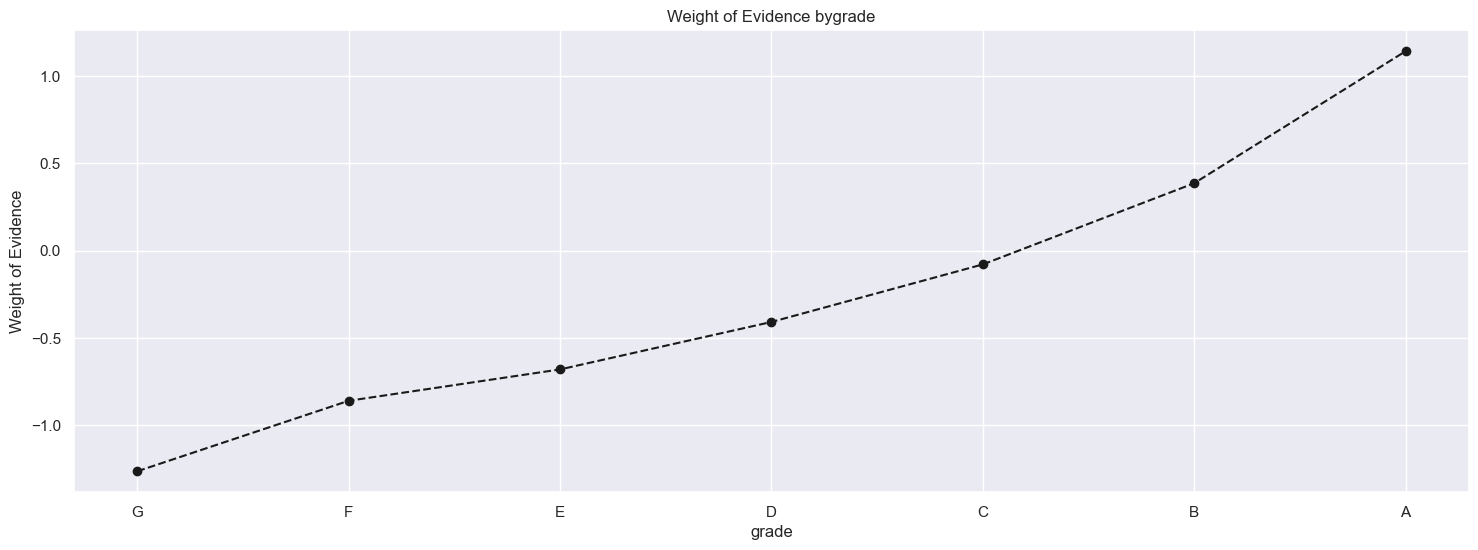

In [593]:
plot_by_WoE(df_temp)

### 2. sub_grade

In [594]:
df_temp = woe_discrete(df_inputs_prepr , 'sub_grade' , df_targets_prepr)

In [595]:
df_temp

,sub_grade,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_good,diff_WoE,IV
0,G1,234,0.675214,0.002509,158.0,76.0,0.001902,0.007458,-1.366379,NaN,NaN,0.330508
1,G5,91,0.681319,0.000976,62.0,29.0,0.000746,0.002846,-1.338402,0.006105,0.027977,0.330508
2,G2,147,0.687075,0.001576,101.0,46.0,0.001216,0.004514,-1.311762,0.005756,0.026641,0.330508
3,G3,125,0.704000,0.001340,88.0,37.0,0.001059,0.003631,-1.231822,0.016925,0.079940,0.330508
4,F5,302,0.708609,0.003238,214.0,88.0,0.002576,0.008636,-1.209601,0.004609,0.022220,0.330508
5,F4,443,0.765237,0.004750,339.0,104.0,0.004081,0.010206,-0.916631,0.056628,0.292970,0.330508
6,E4,1203,0.768911,0.012900,925.0,278.0,0.011136,0.027282,-0.896068,0.003674,0.020563,0.330508
7,F3,568,0.769366,0.006091,437.0,131.0,0.005261,0.012856,-0.893505,0.000455,0.002563,0.330508
8,E5,1005,0.776119,0.010777,780.0,225.0,0.009390,0.022080,-0.855047,0.006753,0.038458,0.330508
9,F1,766,0.788512,0.008214,604.0,162.0,0.007271,0.015898,-0.782263,0.012392,0.072784,0.330508


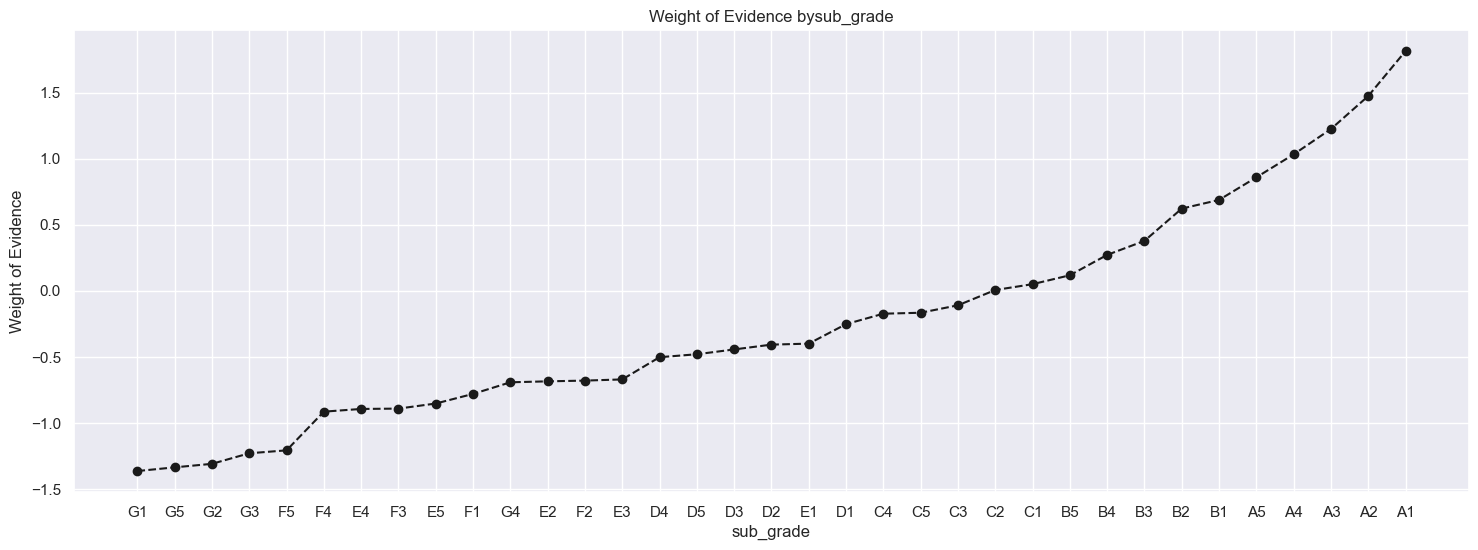

In [596]:
plot_by_WoE(df_temp)

In [597]:
df_inputs_prepr['sub_grade:F5_G1_G3_G5_F4_G4_F3_G2'] = sum([df_inputs_prepr['sub_grade:F5'],
                                                            df_inputs_prepr['sub_grade:G1'],
                                                            df_inputs_prepr['sub_grade:G3'],
                                                            df_inputs_prepr['sub_grade:G5'],
                                                            df_inputs_prepr['sub_grade:F4'],
                                                            df_inputs_prepr['sub_grade:G4'],
                                                            df_inputs_prepr['sub_grade:F3'],
                                                            df_inputs_prepr['sub_grade:G2']])

df_inputs_prepr['sub_grade:F2_E5_F1'] = sum([df_inputs_prepr['sub_grade:F2'],
                                             df_inputs_prepr['sub_grade:E5'],
                                             df_inputs_prepr['sub_grade:F1']])

df_inputs_prepr['sub_grade:E4_E2_E3'] = sum([df_inputs_prepr['sub_grade:E4'],
                                             df_inputs_prepr['sub_grade:E2'],
                                             df_inputs_prepr['sub_grade:E3']])

df_inputs_prepr['sub_grade:F1_D5'] = sum([df_inputs_prepr['sub_grade:F1'],
                                          df_inputs_prepr['sub_grade:D5']])

df_inputs_prepr['sub_grade:A3_A2_A1'] = sum([df_inputs_prepr['sub_grade:A3'],
                                             df_inputs_prepr['sub_grade:A2'],
                                             df_inputs_prepr['sub_grade:A1']])

In [598]:
df_inputs_prepr.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

### 3. home_ownership

In [599]:
df_temp = woe_discrete(df_inputs_prepr , 'home_ownership' , df_targets_prepr)

In [600]:
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,45,0.777778,0.000483,35.0,10.0,0.000421,0.000981,-0.845478,NaN,NaN,0.022938
1,NONE,10,0.800000,0.000107,8.0,2.0,0.000096,0.000196,-0.711946,0.022222,0.133531,0.022938
2,RENT,37874,0.874003,0.406125,33102.0,4772.0,0.398498,0.468302,-0.161412,0.074003,0.550534,0.022938
3,OWN,8409,0.888572,0.090170,7472.0,937.0,0.089951,0.091953,-0.022006,0.014568,0.139406,0.022938
4,MORTGAGE,46919,0.904751,0.503115,42450.0,4469.0,0.511033,0.438567,0.152922,0.016179,0.174928,0.022938


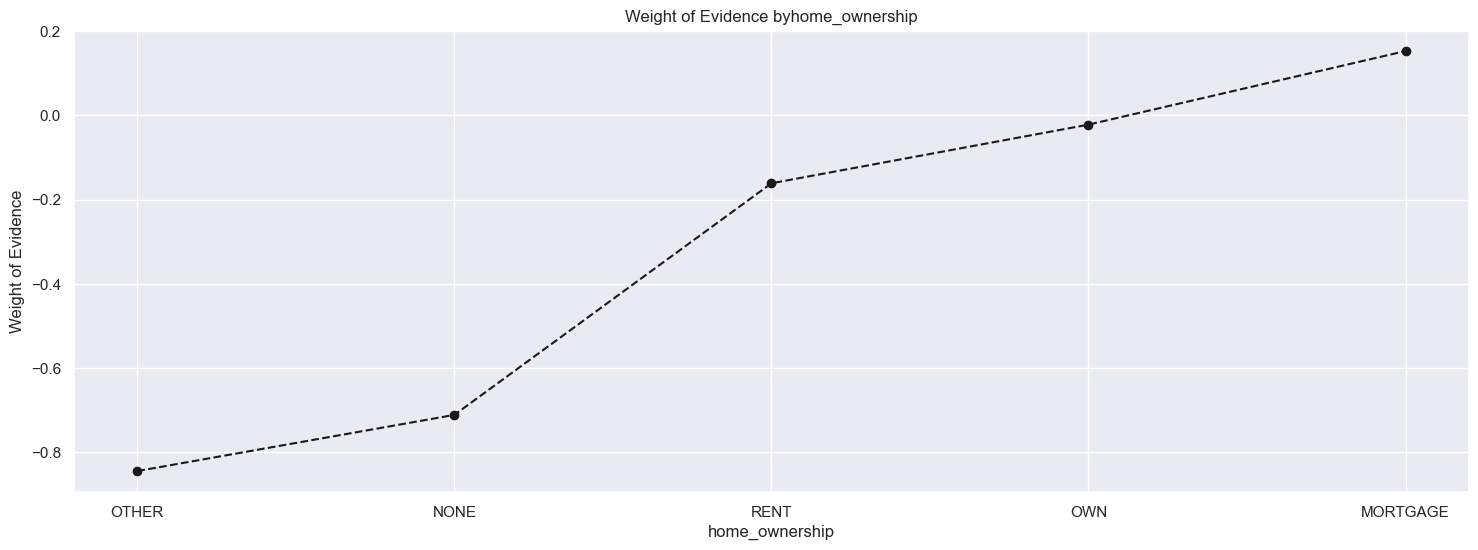

In [601]:
plot_by_WoE(df_temp)

In [602]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                            df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'],
                                                            df_inputs_prepr['home_ownership:ANY']])

In [603]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

### Creating WOE chart for addr_state

In [604]:
len(df_inputs_prepr['addr_state'].unique())

50

In [605]:
df_temp = woe_discrete(df_inputs_prepr , 'addr_state' , df_targets_prepr)
df_temp

C:\Users\kushw\anaconda3\envs\tf-env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,addr_state,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_good,diff_WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000098,-inf,NaN,NaN,inf
1,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000098,-2.098241,0.500000,inf,inf
2,NV,1298,0.855932,0.013919,1111.0,187.0,0.013375,0.018351,-0.316333,0.355932,1.781907,inf
3,HI,486,0.860082,0.005211,418.0,68.0,0.005032,0.006673,-0.282267,0.004150,0.034067,inf
4,FL,6426,0.870059,0.068906,5591.0,835.0,0.067307,0.081943,-0.196759,0.009977,0.085508,inf
5,AL,1182,0.873096,0.012675,1032.0,150.0,0.012424,0.014720,-0.169622,0.003037,0.027137,inf
6,NJ,3676,0.875408,0.039418,3218.0,458.0,0.038740,0.044946,-0.148595,0.002312,0.021027,inf
7,LA,1130,0.876106,0.012117,990.0,140.0,0.011918,0.013739,-0.142178,0.000698,0.006416,inf
8,NY,8031,0.879965,0.086117,7067.0,964.0,0.085076,0.094603,-0.106141,0.003859,0.036038,inf
9,RI,403,0.880893,0.004321,355.0,48.0,0.004274,0.004711,-0.097324,0.000928,0.008817,inf


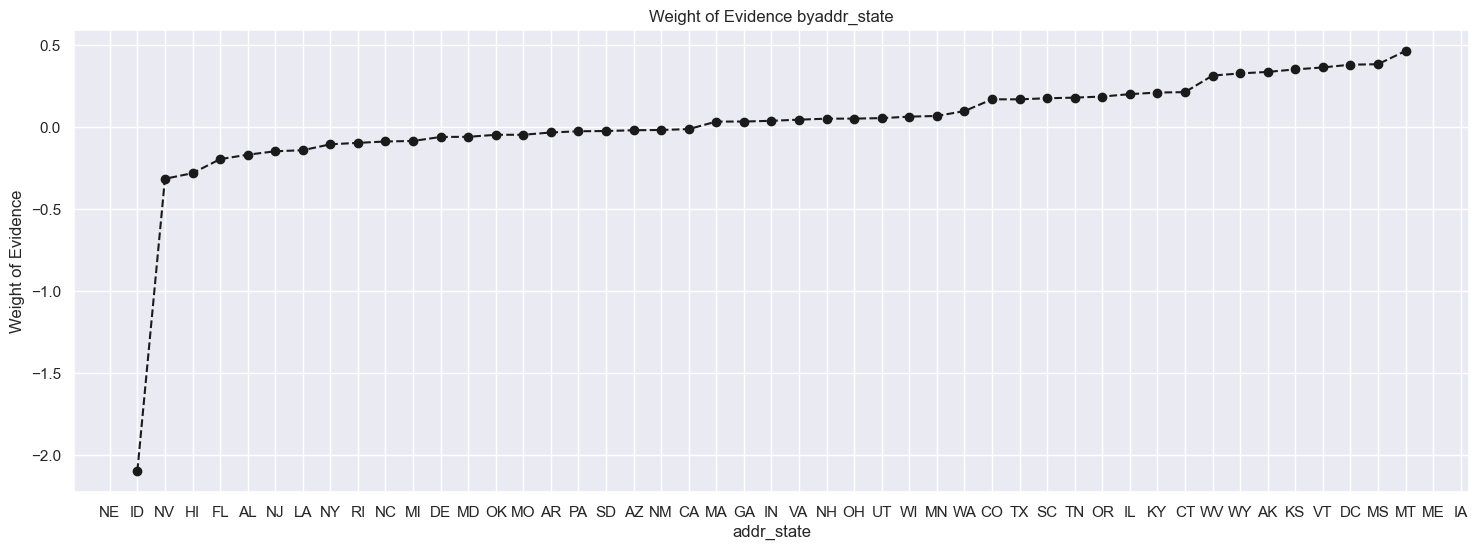

In [606]:
plot_by_WoE(df_temp)

In [607]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

### 6. addr_state

In [608]:
#concatinnating different categories together
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'],
                                                          df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:IA'],
                                                          df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:FL'],
                                                          df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

In [609]:
df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'],
                                                          df_inputs_prepr['addr_state:VA']])

In [610]:
df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'],
                                                          df_inputs_prepr['addr_state:TN'],
                                                          df_inputs_prepr['addr_state:MO'],
                                                          df_inputs_prepr['addr_state:LA'],
                                                          df_inputs_prepr['addr_state:MD'],
                                                          df_inputs_prepr['addr_state:NC']])

In [611]:
df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'],
                                                          df_inputs_prepr['addr_state:KY'],
                                                          df_inputs_prepr['addr_state:AZ'],
                                                          df_inputs_prepr['addr_state:NJ']])

In [612]:
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'],
                                                          df_inputs_prepr['addr_state:MI'],
                                                          df_inputs_prepr['addr_state:PA'],
                                                          df_inputs_prepr['addr_state:OH'],
                                                          df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:ND'],
                                                          df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:IA'],
                                                          df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:FL'],
                                                          df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'],
                                                          df_inputs_prepr['addr_state:WA'],
                                                          df_inputs_prepr['addr_state:OR']])

In [613]:
df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:MT'],
                                                          df_inputs_prepr['addr_state:WI']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'],
                                                          df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'],
                                                          df_inputs_prepr['addr_state:SC'],
                                                          df_inputs_prepr['addr_state:CO'],
                                                          df_inputs_prepr['addr_state:VT'],
                                                          df_inputs_prepr['addr_state:AK'],
                                                          df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'],
                                                          df_inputs_prepr['addr_state:NH'],
                                                          df_inputs_prepr['addr_state:WY'],
                                                          df_inputs_prepr['addr_state:DC'],
                                                          df_inputs_prepr['addr_state:ME'],
                                                          df_inputs_prepr['addr_state:ID']])

### 4. verification_status

In [614]:
df_temp = woe_discrete(df_inputs_prepr , 'verification_status' , df_targets_prepr)

In [615]:
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33641,0.872031,0.360734,29336.0,4305.0,0.353161,0.422473,-0.179202,NaN,NaN,0.022684
1,Source Verified,29963,0.895738,0.321295,26839.0,3124.0,0.323101,0.306575,0.052501,0.023707,0.231704,0.022684
2,Not Verified,29653,0.906890,0.317971,26892.0,2761.0,0.323739,0.270952,0.177995,0.011152,0.125494,0.022684


### 5. purpose

In [616]:
df_temp = woe_discrete(df_inputs_prepr , 'purpose' , df_targets_prepr)

In [617]:
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_good,diff_WoE,IV
0,educational,89,0.752809,0.000954,67.0,22.0,0.000807,0.002159,-0.984590,NaN,NaN,0.045124
1,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000650,0.001570,-0.881845,0.018620,0.102745,0.045124
2,small_business,1431,0.777079,0.015345,1112.0,319.0,0.013387,0.031305,-0.849516,0.005650,0.032329,0.045124
3,medical,918,0.857298,0.009844,787.0,131.0,0.009474,0.012856,-0.305210,0.080220,0.544307,0.045124
4,house,439,0.858770,0.004707,377.0,62.0,0.004539,0.006084,-0.293130,0.001471,0.012080,0.045124
5,other,4806,0.861007,0.051535,4138.0,668.0,0.049815,0.065554,-0.274561,0.002237,0.018569,0.045124
6,wedding,456,0.864035,0.004890,394.0,62.0,0.004743,0.006084,-0.249024,0.003028,0.025537,0.045124
7,moving,602,0.878738,0.006455,529.0,73.0,0.006368,0.007164,-0.117712,0.014702,0.131312,0.045124
8,vacation,496,0.881048,0.005319,437.0,59.0,0.005261,0.005790,-0.095845,0.002311,0.021867,0.045124
9,debt_consolidation,55012,0.885916,0.589897,48736.0,6276.0,0.586707,0.615898,-0.048556,0.004867,0.047289,0.045124


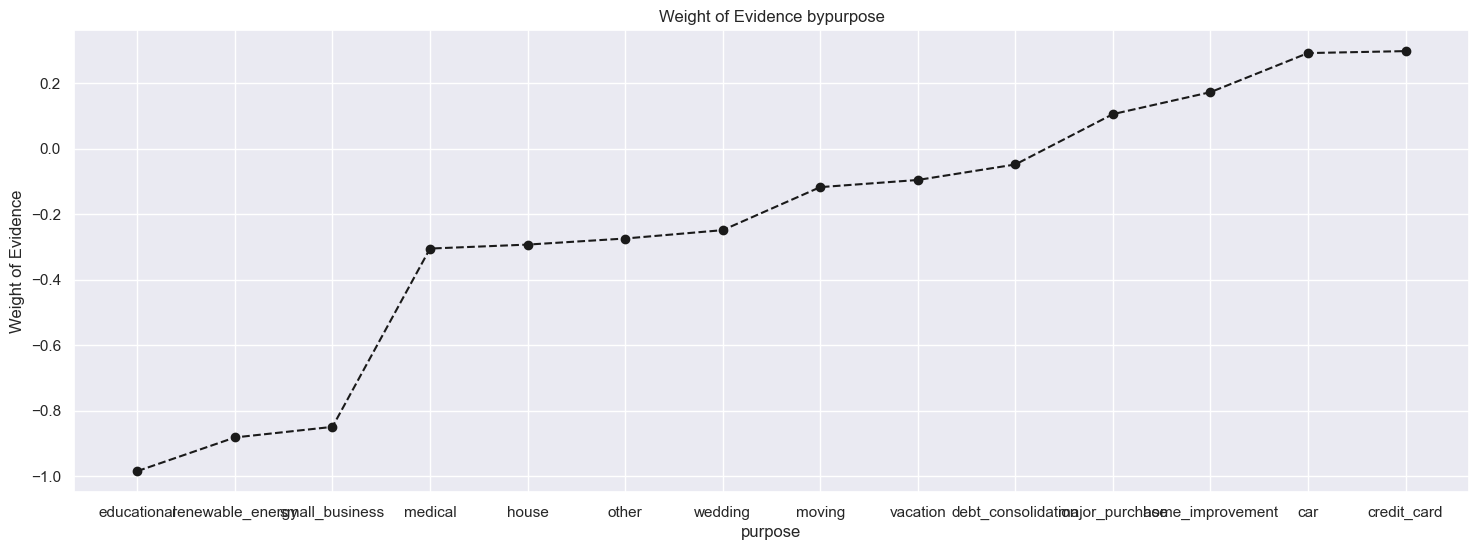

In [618]:
plot_by_WoE(df_temp)

course classing on the basis of course classing
on the basis as follow:
1. higher_risk_group = small buisness , education
2. medium_risk_group = moving, house, other, renewable_energy, medical
3. low_risk_group = wedding, vacation, debt consodilation
4. very_low_risk_group = car, credit

In [619]:
df_inputs_prepr['purpose:small_business_educational'] = sum([df_inputs_prepr['purpose:small_business'],
                                                             df_inputs_prepr['purpose:educational']])

df_inputs_prepr['purpose:moving_house_other_renewable_energy_medical'] = sum([df_inputs_prepr['purpose:moving'],
                                                                              df_inputs_prepr['purpose:house'],
                                                                              df_inputs_prepr['purpose:other'],
                                                                              df_inputs_prepr['purpose:renewable_energy'],
                                                                              df_inputs_prepr['purpose:medical']])

df_inputs_prepr['purpose:wedding_vacation_debt_consolidation_home_improvement_major_purchase'] = sum([df_inputs_prepr['purpose:wedding'],
                                                             df_inputs_prepr['purpose:vacation'],
                                                             df_inputs_prepr['purpose:debt_consolidation'],
                                                             df_inputs_prepr['purpose:home_improvement'],
                                                             df_inputs_prepr['purpose:major_purchase']])

df_inputs_prepr['purpose:small_buisness_educational'] = sum([df_inputs_prepr['purpose:car'],
                                                             df_inputs_prepr['purpose:credit_card']])

## Working and converting Continous variable 

In [620]:
def woe_continous(df , column , target_df):
    df = pd.concat([df[column] , target_df] , axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].mean()] , axis = 1)
    df = df.iloc[: , [0,1,3]]
    df.columns = [df.columns.values[0] , 'n_obs', 'good_prop']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_goods'] = df['n_obs'] * df['good_prop']
    df['n_bads'] = df['n_obs'] * (1 - df['good_prop'])
    df['prop_n_goods']  = df['n_goods'] / df['n_goods'].sum()
    df['prop_n_bads'] = df['n_bads'] / df['n_bads'].sum()
    df['WoE' ] = np.log(df['prop_n_goods'] / df['prop_n_bads'])
    df['diff_prop_goods'] = df['good_prop'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = ((df['prop_n_goods'] - df['prop_n_bads'] ) * df['WoE'])
    df['IV'] = df['IV'].sum()
    return df


### 1. term_int

In [621]:
df_temp = woe_continous(df_inputs_prepr , 'term_int', df_targets_prepr)

In [622]:
df_temp

,term_int,n_obs,good_prop,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_goods,diff_WoE,IV
0,36,67534,0.902597,0.724171,60956.0,6578.0,0.733817,0.645535,0.128181,NaN,NaN,0.036603
1,60,25723,0.859581,0.275829,22111.0,3612.0,0.266183,0.354465,-0.286427,0.043016,0.414608,0.036603


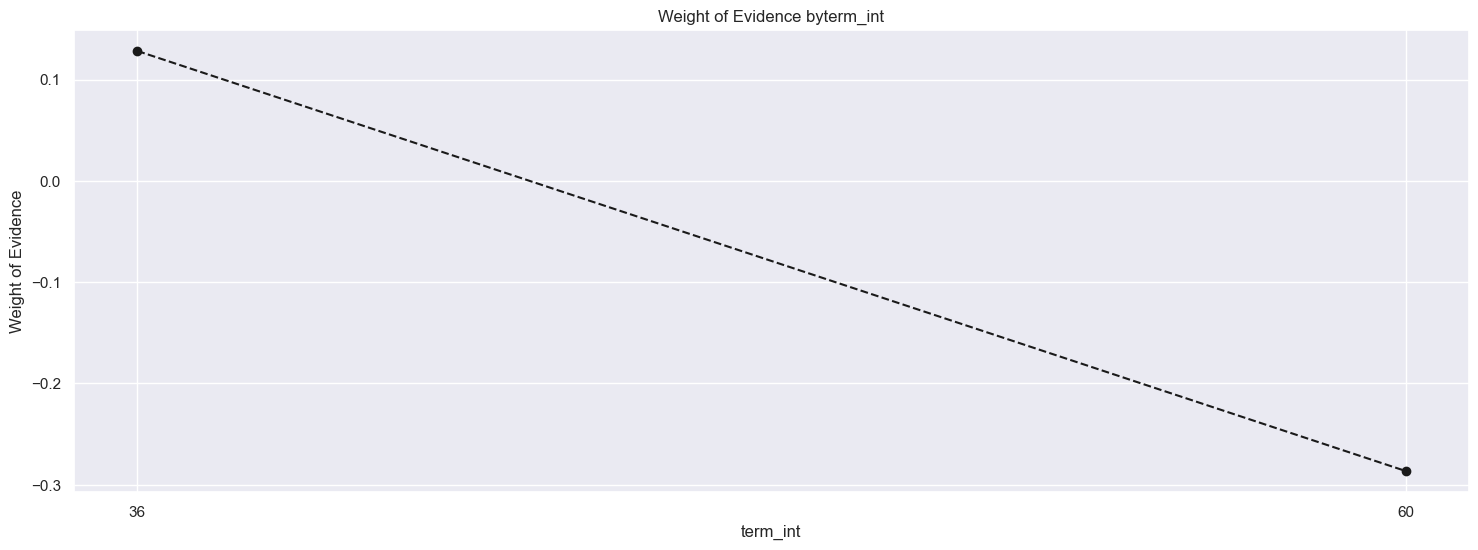

In [623]:
plot_by_WoE(df_temp)

In [624]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

### 2. emp_length_int

In [625]:
df_temp = woe_continous(df_inputs_prepr , 'emp_length_int' , df_targets_prepr)
df_temp

,emp_length_int,n_obs,good_prop,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_goods,diff_WoE,IV
0,0,11553,0.874491,0.123883,10103.0,1450.0,0.121625,0.142296,-0.156972,NaN,NaN,0.007766
1,1,5968,0.892594,0.063995,5327.0,641.0,0.064129,0.062905,0.019273,0.018102,0.176245,0.007766
2,2,8295,0.887402,0.088948,7361.0,934.0,0.088615,0.091658,-0.033766,0.005192,0.053039,0.007766
3,3,7391,0.889325,0.079254,6573.0,818.0,0.079129,0.080275,-0.014377,0.001923,0.019389,0.007766
4,4,5555,0.889469,0.059567,4941.0,614.0,0.059482,0.060255,-0.012913,0.000144,0.001465,0.007766
5,5,6172,0.886261,0.066183,5470.0,702.0,0.065850,0.068891,-0.045140,0.003208,0.032228,0.007766
6,6,5225,0.878852,0.056028,4592.0,633.0,0.055281,0.062120,-0.116640,0.007409,0.071500,0.007766
7,7,5131,0.893588,0.055020,4585.0,546.0,0.055196,0.053582,0.029686,0.014736,0.146326,0.007766
8,8,4542,0.890137,0.048704,4043.0,499.0,0.048672,0.048970,-0.006104,0.003451,0.035790,0.007766
9,9,3621,0.892847,0.038828,3233.0,388.0,0.038920,0.038077,0.021920,0.002711,0.028024,0.007766


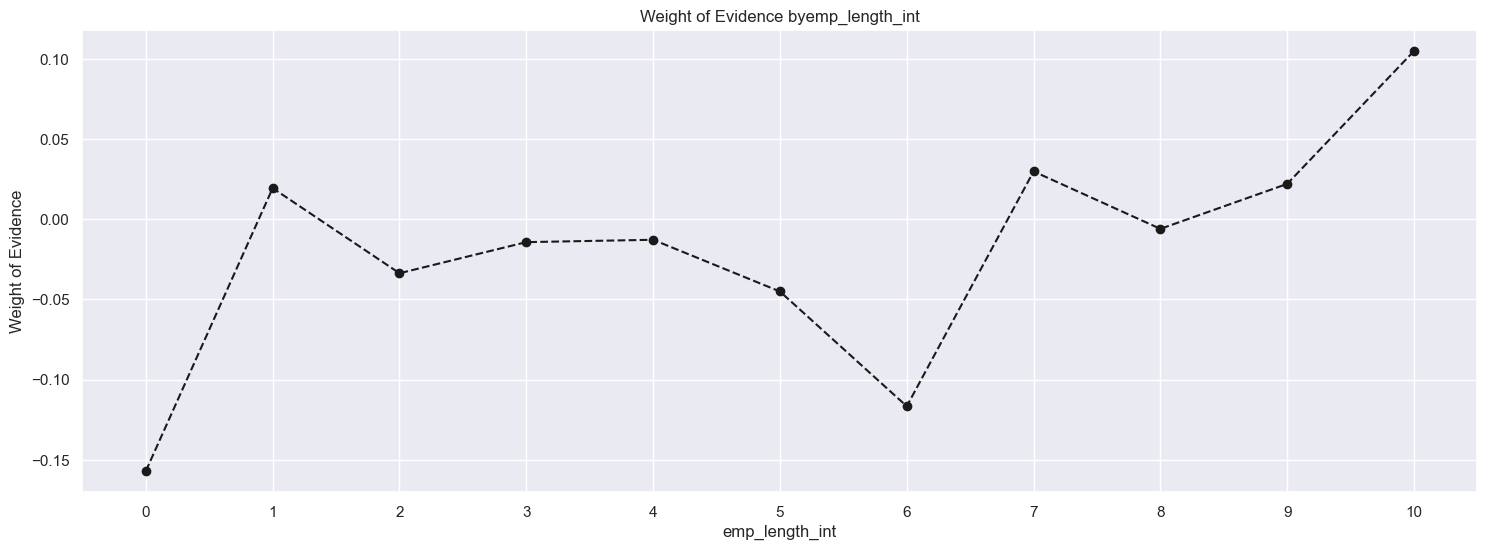

In [626]:
plot_by_WoE(df_temp)

In [627]:
#Applying Course classing to the emp_length_int
df_inputs_prepr['emp_length:0'] = np.where((df_inputs_prepr['emp_length_int'] == 0) , 1 , 0)
df_inputs_prepr['emp_length:1'] = np.where((df_inputs_prepr['emp_length_int'] == 1) , 1 , 0)
df_inputs_prepr['emp_length:2_3_4'] = np.where((df_inputs_prepr['emp_length_int'].isin(range(2,5))) , 1 , 0)
df_inputs_prepr['emp_length:5_6'] = np.where((df_inputs_prepr['emp_length_int'].isin([5,6])) , 1 , 0)
df_inputs_prepr['emp_length:7_8_9'] = np.where((df_inputs_prepr['emp_length_int'].isin(range(7,10))) , 1 , 0)
df_inputs_prepr['emp_length:10'] = np.where((df_inputs_prepr['emp_length_int'] == 10) , 1 , 0)

### 3. issue_months

In [628]:
df_inputs_prepr['issue_months'].unique()

array([ 41,  38,  66,  37,  58,  50,  86,  51,  48,  59,  72,  77,  47,
        46,  56,  55, 119,  63, 102,  39,  53,  40,  52,  43,  49,  57,
        45,  36,  54,  74,  44,  73, 103,  70,  95,  89,  68,  82,  71,
        76, 104,  65,  80,  91,  75,  67,  42,  61,  64,  60,  85,  88,
       110,  96,  78,  83,  69,  90,  62, 108,  79,  92, 118,  99,  81,
       115,  97, 114, 116, 100,  93, 117, 106, 124, 101, 125,  87,  84,
        94, 105, 109,  98, 107, 112, 113, 122, 111, 120, 121, 123, 126])

In [629]:
df_inputs_prepr['mnths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['issue_months'], 50)

In [630]:
df_inputs_prepr['mnths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mnths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [631]:
df_temp = woe_continous(df_inputs_prepr , 'mnths_since_issue_d_factor' , df_targets_prepr)
df_temp

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].count(),
C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].mean()] , axis = 1)


,mnths_since_issue_d_factor,n_obs,good_prop,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_goods,diff_WoE,IV
0,"(35.91, 37.8]",7191,0.945766,0.077109,6801.0,390.0,0.081874,0.038273,0.760438,NaN,NaN,0.126297
1,"(37.8, 39.6]",9752,0.930373,0.104571,9073.0,679.0,0.109225,0.066634,0.494196,0.015392,0.266241,0.126297
2,"(39.6, 41.4]",9506,0.919945,0.101933,8745.0,761.0,0.105276,0.074681,0.343363,0.010428,0.150833,0.126297
3,"(41.4, 43.2]",7240,0.909116,0.077635,6582.0,658.0,0.079237,0.064573,0.204648,0.010829,0.138715,0.126297
4,"(43.2, 45.0]",7217,0.902868,0.077388,6516.0,701.0,0.078443,0.068793,0.131267,0.006248,0.073381,0.126297
5,"(45.0, 46.8]",3104,0.895296,0.033284,2779.0,325.0,0.033455,0.031894,0.047781,0.007572,0.083487,0.126297
6,"(46.8, 48.6]",6197,0.890269,0.066451,5517.0,680.0,0.066416,0.066732,-0.004744,0.005027,0.052525,0.126297
7,"(48.6, 50.4]",5821,0.885930,0.062419,5157.0,664.0,0.062082,0.065162,-0.048413,0.004339,0.043669,0.126297
8,"(50.4, 52.2]",5021,0.878909,0.053840,4413.0,608.0,0.053126,0.059666,-0.116106,0.007022,0.067693,0.126297
9,"(52.2, 54.0]",4497,0.874138,0.048222,3931.0,566.0,0.047323,0.055545,-0.160186,0.004770,0.044080,0.126297


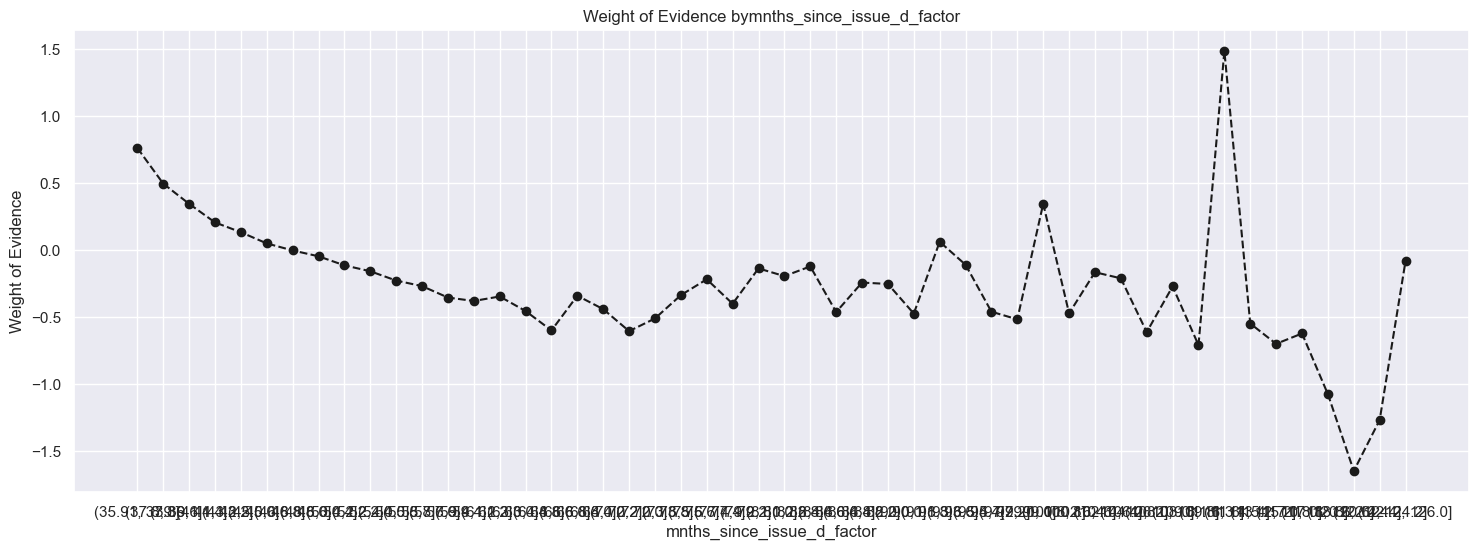

In [632]:
plot_by_WoE(df_temp)

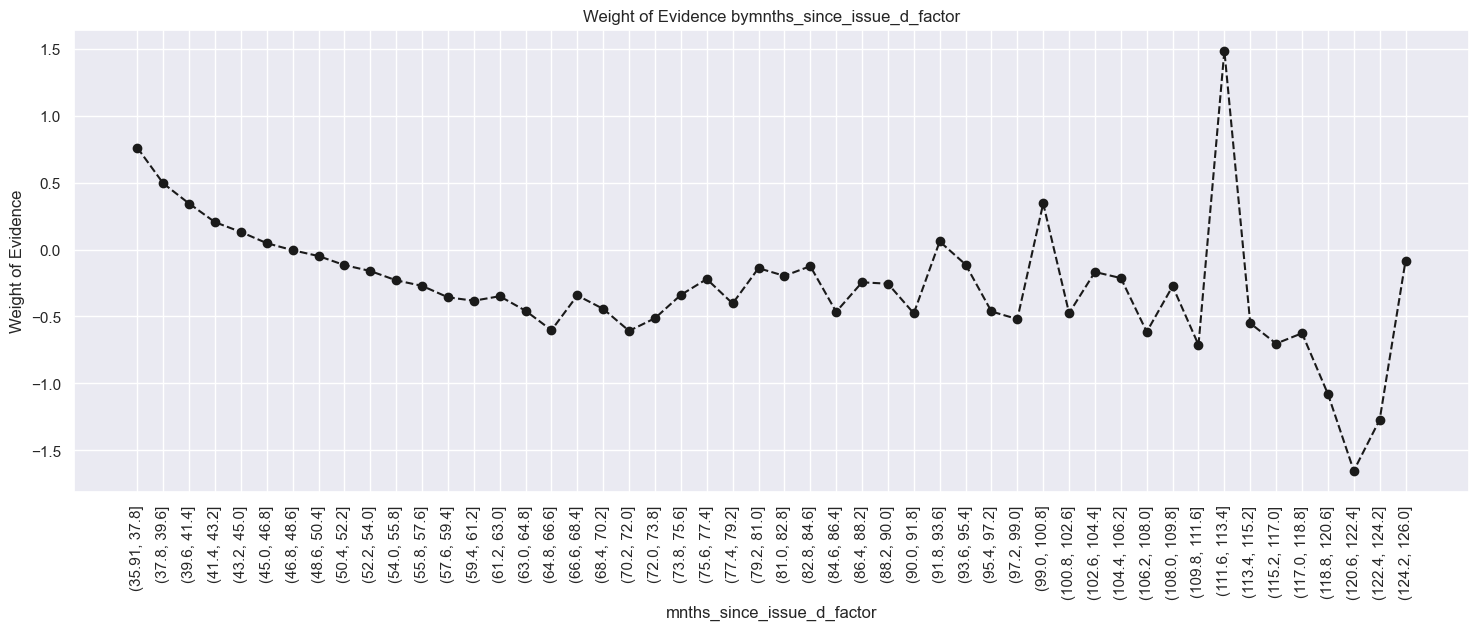

In [633]:
plot_by_WoE(df_temp , 90)

In [634]:
df_inputs_prepr['mnths_since_issue_d:<38'] = np.where((df_inputs_prepr['issue_months'].isin(range(38))), 1, 0)
df_inputs_prepr['mnths_since_issue_d:38-39'] = np.where((df_inputs_prepr['issue_months'].isin(range(38,40))), 1, 0)
df_inputs_prepr['mnths_since_issue_d:40-41'] = np.where((df_inputs_prepr['issue_months'].isin(range(30,42))), 1, 0)
df_inputs_prepr['mnths_since_issue_d:42-48'] = np.where((df_inputs_prepr['issue_months'].isin(range(42,49))), 1, 0)
df_inputs_prepr['mnths_since_issue_d:49-52'] = np.where((df_inputs_prepr['issue_months'].isin(range(49,53))), 1, 0)
df_inputs_prepr['mnths_since_issue_d:53-64'] = np.where((df_inputs_prepr['issue_months'].isin(range(53,65))), 1, 0)
df_inputs_prepr['mnths_since_issue_d:65-84'] = np.where((df_inputs_prepr['issue_months'].isin(range(65,85))), 1, 0)
df_inputs_prepr['mnths_since_issue_d:>84'] = np.where((df_inputs_prepr['issue_months'].isin(range(85, int(df_inputs_prepr['issue_months'].max())))), 1, 0)


### 4. int_rate_factor

In [635]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'] , 50)

In [636]:
df_temp = woe_continous(df_inputs_prepr, 'int_rate_factor',df_targets_prepr)

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].count(),
C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].mean()] , axis = 1)


In [637]:
df_temp

,int_rate_factor,n_obs,good_prop,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_goods,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002311,0.000589,1.367495,NaN,NaN,0.371465
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024607,0.004122,1.786754,0.010169,0.419258,0.371465
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023102,0.005397,1.453986,0.007728,0.332768,0.371465
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005465,0.002257,0.884362,0.020356,0.569623,0.371465
4,"(7.071, 7.484]",804,0.981343,0.008621,789.0,15.0,0.009498,0.001472,1.864475,0.029561,0.980113,0.371465
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037717,0.010991,1.233007,0.015858,0.631469,0.371465
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027809,0.011678,0.867639,0.014477,0.365368,0.371465
7,"(8.31, 8.722]",1680,0.965476,0.018015,1622.0,58.0,0.019526,0.005692,1.232732,0.014468,0.365093,0.371465
8,"(8.722, 9.135]",2384,0.942114,0.025564,2246.0,138.0,0.027038,0.013543,0.691412,0.023362,0.541320,0.371465
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018696,0.003631,1.638785,0.034615,0.947373,0.371465


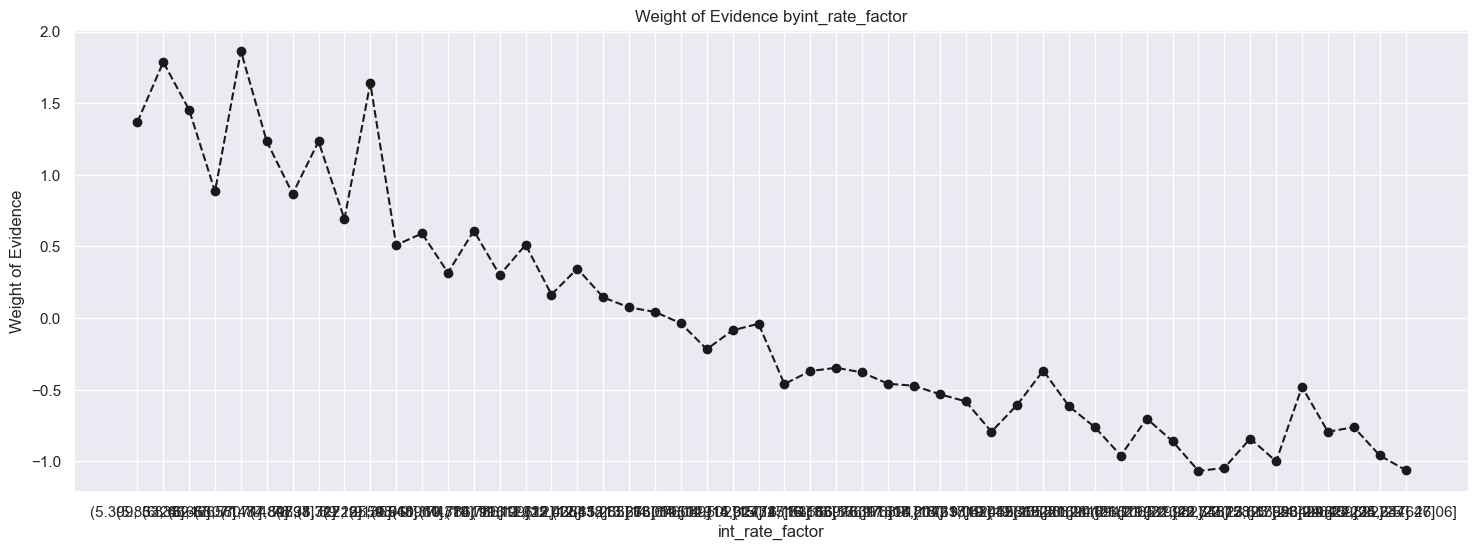

In [638]:
plot_by_WoE(df_temp)

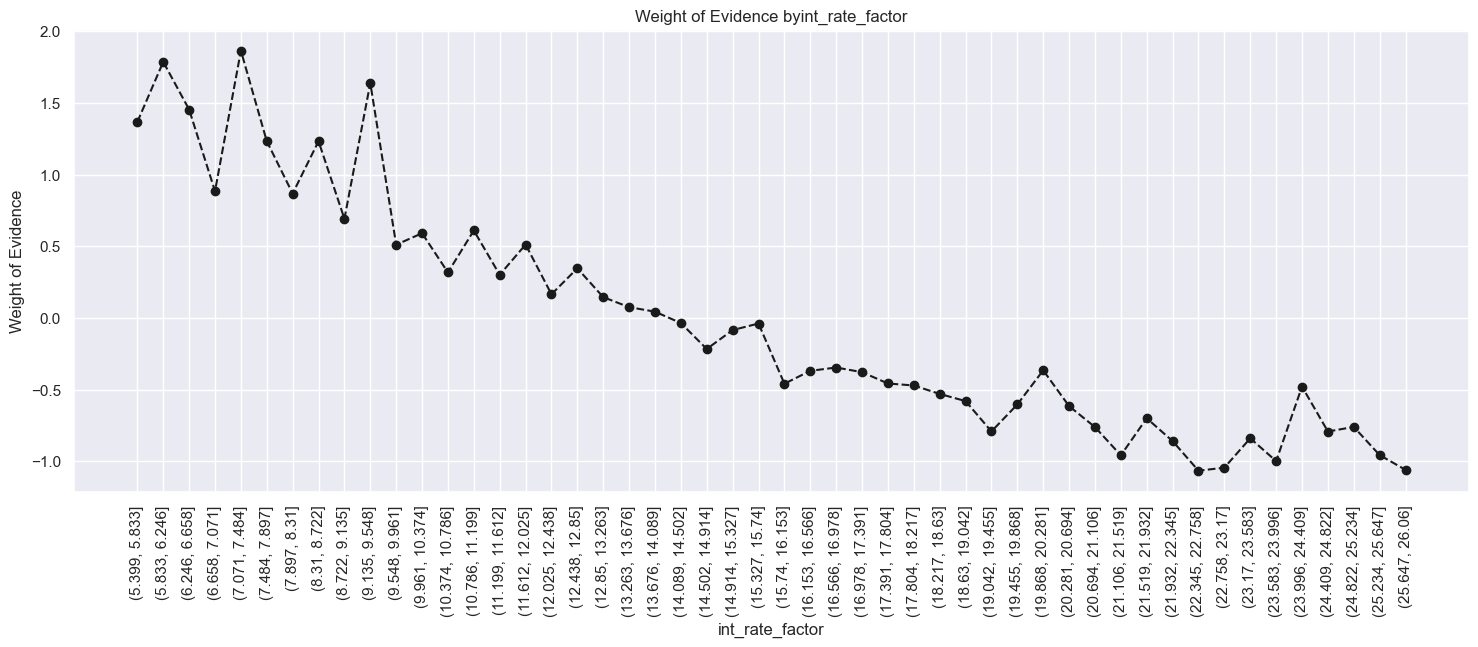

In [639]:
plot_by_WoE(df_temp , 90)

In [640]:
df_inputs_prepr['int_rate:<9.548'] = np.where(df_inputs_prepr['int_rate'] <= 9.548, 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where(df_inputs_prepr['int_rate'] > 20.281, 1, 0)

### 4. Funded amount

In [641]:
df_inputs_prepr['funded_amnt']

362514    32500
288564    11000
213591    30000
263083    14400
165001    15000
          ...  
115        8000
296284    24000
61777     35000
91763     18000
167512    16000
Name: funded_amnt, Length: 93257, dtype: int64

In [642]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'] , 50)

In [643]:
df_inputs_prepr['funded_amnt_factor']

362514    (32240.0, 32930.0]
288564    (10850.0, 11540.0]
213591    (29480.0, 30170.0]
263083    (14300.0, 14990.0]
165001    (14990.0, 15680.0]
                 ...        
115         (7400.0, 8090.0]
296284    (23960.0, 24650.0]
61777     (34310.0, 35000.0]
91763     (17750.0, 18440.0]
167512    (15680.0, 16370.0]
Name: funded_amnt_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(465.5, 1190.0] < (1190.0, 1880.0] < (1880.0, 2570.0] < (2570.0, 3260.0] ... (32240.0, 32930.0] < (32930.0, 33620.0] < (33620.0, 34310.0] < (34310.0, 35000.0]]

In [644]:
df_temp = woe_continous(df_inputs_prepr , 'funded_amnt_factor' , df_targets_prepr)
df_temp

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].count(),
C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].mean()] , axis = 1)


,funded_amnt_factor,n_obs,good_prop,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_goods,diff_WoE,IV
0,"(465.5, 1190.0]",319,0.880878,0.003421,281.0,38.0,0.003383,0.003729,-0.097472,NaN,NaN,0.018663
1,"(1190.0, 1880.0]",800,0.896250,0.008578,717.0,83.0,0.008632,0.008145,0.057995,0.015372,0.155467,0.018663
2,"(1880.0, 2570.0]",1513,0.900198,0.016224,1362.0,151.0,0.016396,0.014818,0.101189,0.003948,0.043194,0.018663
3,"(2570.0, 3260.0]",1817,0.893781,0.019484,1624.0,193.0,0.019550,0.018940,0.031717,0.006417,0.069472,0.018663
4,"(3260.0, 3950.0]",1245,0.891566,0.013350,1110.0,135.0,0.013363,0.013248,0.008600,0.002215,0.023117,0.018663
5,"(3950.0, 4640.0]",2298,0.882942,0.024642,2029.0,269.0,0.024426,0.026398,-0.077654,0.008625,0.086254,0.018663
6,"(4640.0, 5330.0]",3957,0.898155,0.042431,3554.0,403.0,0.042785,0.039549,0.078652,0.015213,0.156305,0.018663
7,"(5330.0, 6020.0]",4186,0.906593,0.044887,3795.0,391.0,0.045686,0.038371,0.174491,0.008438,0.095840,0.018663
8,"(6020.0, 6710.0]",1718,0.881839,0.018422,1515.0,203.0,0.018238,0.019921,-0.088276,0.024754,0.262767,0.018663
9,"(6710.0, 7400.0]",2880,0.893403,0.030882,2573.0,307.0,0.030975,0.030128,0.027739,0.011563,0.116015,0.018663


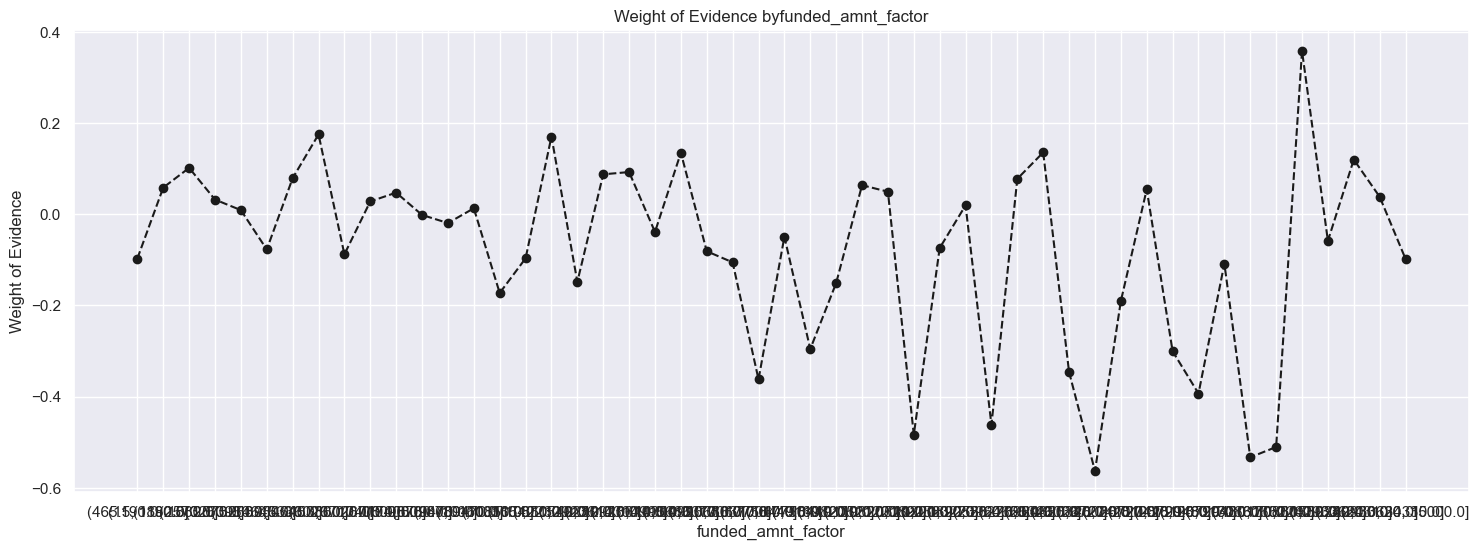

In [645]:
plot_by_WoE(df_temp)

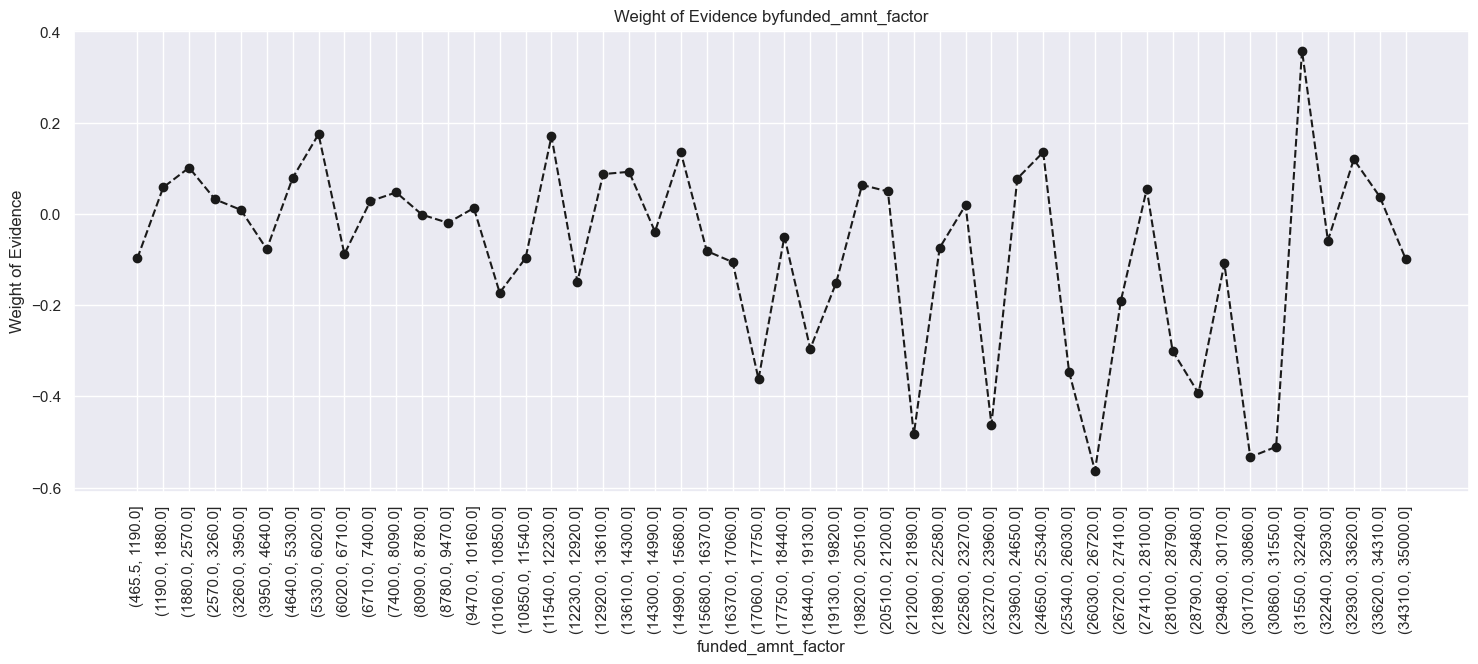

In [646]:
plot_by_WoE(df_temp , 90)

### 6. annual_inc

In [647]:
df_inputs_prepr['annual_inc']

362514     65000.0
288564     60000.0
213591    175000.0
263083     66000.0
165001     85000.0
            ...   
115        35000.0
296284     95000.0
61777     150000.0
91763      55000.0
167512     90000.0
Name: annual_inc, Length: 93257, dtype: float64

In [648]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'] , 100)

In [649]:
df_temp = woe_continous(df_inputs_prepr , 'annual_inc_factor' , df_targets_prepr)
df_temp

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].count(),
C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].mean()] , axis = 1)


,annual_inc_factor,n_obs,good_prop,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_goods,diff_WoE,IV
0,"(-2695.2, 79752.0]",62621,0.877932,0.671488,54977.0,7644.0,0.661839,0.750147,-0.125247,NaN,NaN,inf
1,"(79752.0, 154704.0]",26582,0.915206,0.285040,24328.0,2254.0,0.292872,0.221197,0.280681,0.037273,0.405928,inf
2,"(154704.0, 229656.0]",2916,0.926269,0.031268,2701.0,215.0,0.032516,0.021099,0.432499,0.011063,0.151818,inf
3,"(229656.0, 304608.0]",710,0.928169,0.007613,659.0,51.0,0.007933,0.005005,0.460657,0.001900,0.028159,inf
4,"(304608.0, 379560.0]",171,0.929825,0.001834,159.0,12.0,0.001914,0.001178,0.485757,0.001656,0.025100,inf
5,"(379560.0, 454512.0]",111,0.927928,0.001190,103.0,8.0,0.001240,0.000785,0.457047,0.001897,0.028710,inf
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000614,0.000196,1.140438,0.034336,0.683391,inf
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000385,0.000098,1.367495,0.007433,0.227057,inf
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000120,0.000000,inf,0.030303,inf,inf
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000144,0.000098,0.386666,0.076923,inf,inf


In [650]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000 , :]

In [651]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'] , 50)
df_temp = woe_continous(df_inputs_prepr_temp , 'annual_inc_factor', df_targets_prepr)

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3889679285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'] , 50)
C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].count(),
C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to T

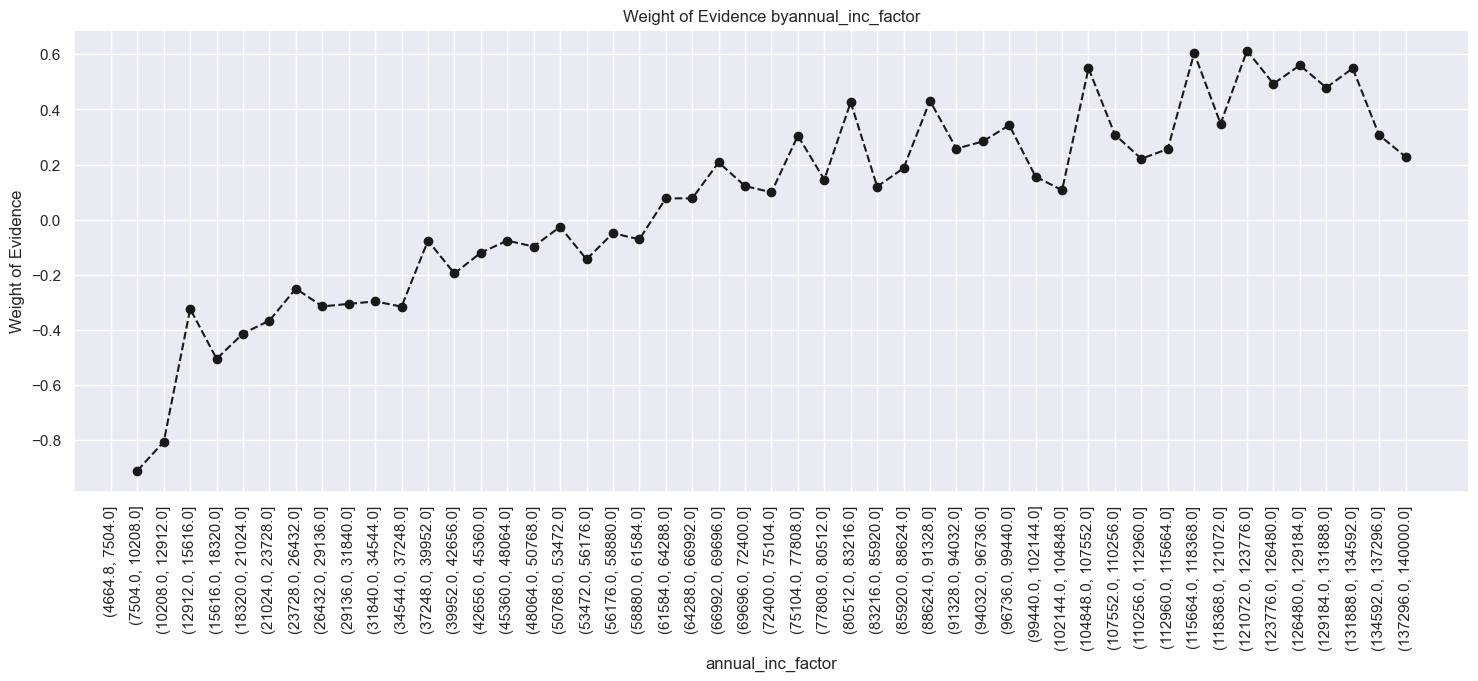

In [652]:
plot_by_WoE(df_temp , 90)

In [653]:
df_inputs_prepr['annual_inc:<20k'] = np.where((df_inputs_prepr['annual_inc'] < 20000) , 1 , 0)
df_inputs_prepr['annual_inc:20k-30k'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1 , 0)
df_inputs_prepr['annual_inc:30k-40k'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1 , 0)
df_inputs_prepr['annual_inc:40k-50k'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1 , 0)
df_inputs_prepr['annual_inc:50k-60k'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1 , 0)
df_inputs_prepr['annual_inc:60k-70k'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1 , 0)
df_inputs_prepr['annual_inc:70k-80k'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1 , 0)
df_inputs_prepr['annual_inc:80k-90k'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1 , 0)
df_inputs_prepr['annual_inc:90k-100k'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1 , 0)
df_inputs_prepr['annual_inc:100k-110k'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 110000), 1 , 0)
df_inputs_prepr['annual_inc:110k-120k'] = np.where((df_inputs_prepr['annual_inc'] > 110000) & (df_inputs_prepr['annual_inc'] <= 120000), 1 , 0)
df_inputs_prepr['annual_inc:120k-130k'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 130000), 1 , 0)
df_inputs_prepr['annual_inc:130k-140k'] = np.where((df_inputs_prepr['annual_inc'] > 130000) & (df_inputs_prepr['annual_inc'] <= 140000), 1 , 0)
df_inputs_prepr['annual_inc:140k>'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1 , 0)

### 7. mths_since_last_delinq

In [654]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_continous(df_inputs_prepr_temp , 'mths_since_last_delinq_factor' , df_targets_prepr)
df_temp

C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\526924406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0] , as_index = False)[df.columns.values[1]].count(),
C:\Users\kushw\AppData\Local\Temp\ipykernel_7664\3054948376.py:4: FutureWarning: The default of observed=False is deprecated an

,mths_since_last_delinq_factor,n_obs,good_prop,prop_n_obs,n_goods,n_bads,prop_n_goods,prop_n_bads,WoE,diff_prop_goods,diff_WoE,IV
0,"(-0.17, 3.4]",1348,0.868694,0.031283,1171.0,177.0,0.030501,0.037668,-0.211036,NaN,NaN,inf
1,"(3.4, 6.8]",1890,0.880423,0.043861,1664.0,226.0,0.043342,0.048095,-0.104055,0.011729,0.106981,inf
2,"(6.8, 10.2]",3373,0.887044,0.078276,2992.0,381.0,0.077933,0.081081,-0.039601,0.006621,0.064453,inf
3,"(10.2, 13.6]",2496,0.895833,0.057924,2236.0,260.0,0.058241,0.055331,0.051263,0.008789,0.090864,inf
4,"(13.6, 17.0]",3165,0.884044,0.073449,2798.0,367.0,0.072880,0.078102,-0.069201,0.011789,0.120464,inf
5,"(17.0, 20.4]",2282,0.893076,0.052958,2038.0,244.0,0.053084,0.051926,0.022057,0.009032,0.091258,inf
6,"(20.4, 23.8]",2115,0.898345,0.049082,1900.0,215.0,0.049489,0.045754,0.078472,0.005269,0.056415,inf
7,"(23.8, 27.2]",2755,0.895463,0.063934,2467.0,288.0,0.064258,0.061290,0.047298,0.002882,0.031174,inf
8,"(27.2, 30.6]",1929,0.896319,0.044766,1729.0,200.0,0.045035,0.042562,0.056482,0.000857,0.009183,inf
9,"(30.6, 34.0]",2453,0.891969,0.056926,2188.0,265.0,0.056991,0.056395,0.010514,0.004350,0.045968,inf


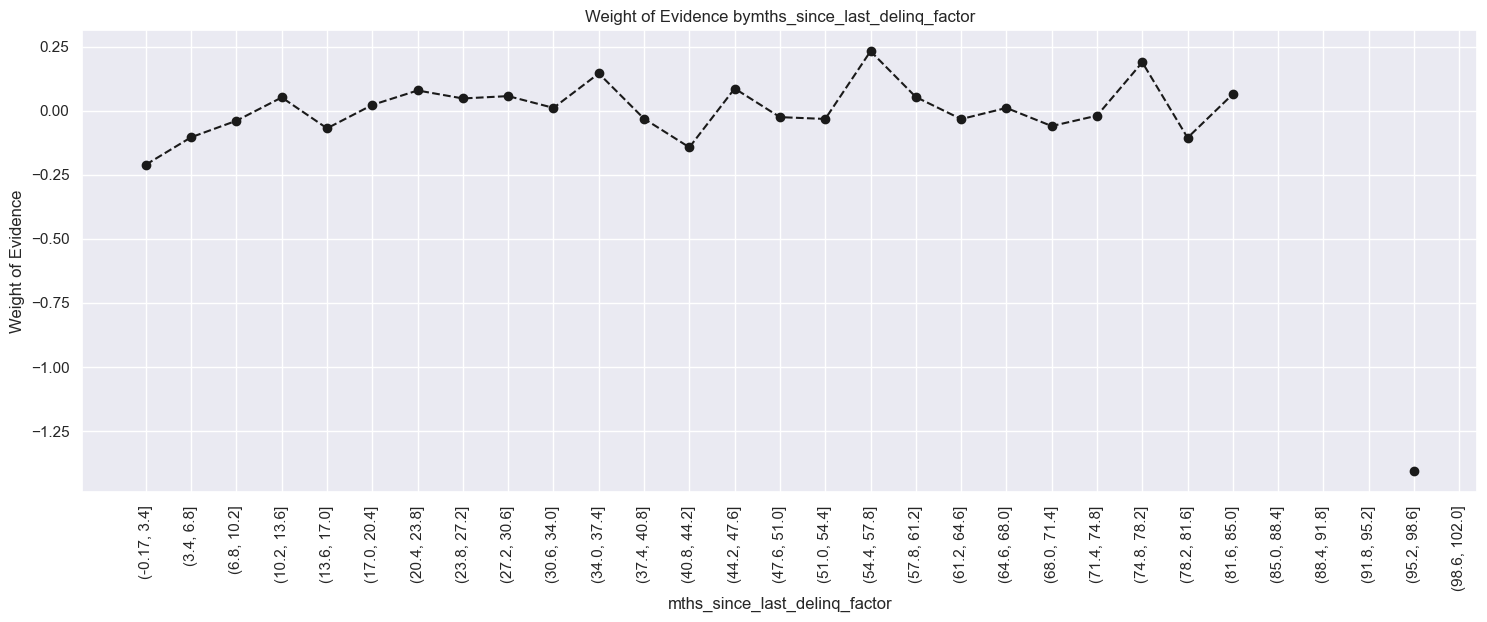

In [655]:
plot_by_WoE(df_temp , 90)

In [656]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=0) & (df_inputs_prepr['mths_since_last_delinq'] < 3),1,0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=4) & (df_inputs_prepr['mths_since_last_delinq'] < 31),1,0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=31) & (df_inputs_prepr['mths_since_last_delinq'] < 56),1,0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=57) ,1,0)


## Preprocessing Test data set

In [657]:
#loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

In [659]:
loan_data_inputs_train.shape

(373028, 206)

In [661]:
loan_data_targets_train.shape

(373028,)

In [660]:
loan_data_inputs_test.shape

(93257, 272)

In [662]:
loan_data_targets_test.shape

(93257,)

In [658]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')